In [1]:
import pandas as pd
import numpy as np
import os.path
#path = "C:/Users/Xin~/Documents/CaliforniaHousing"
#alldata = pd.read_csv(path+"/all_data.csv",header=0)
# crime rate data in 2015
#ft1 = pd.read_csv("crime.csv")

In [2]:
#alldata = pd.merge(ft1,alldata,on="RegionName",how = "outer")

In [5]:
#alldata.keys()
#alldata.to_csv("all_data_crimerate.csv")
alldata = pd.read_csv("../Data/all_data_crimerate.csv")

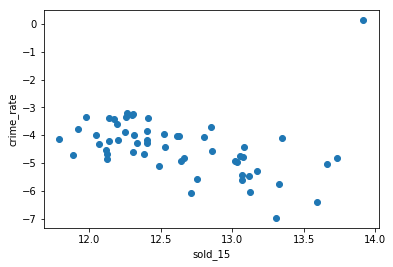

In [6]:
# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
# made log transformation. There seems to be a outlier
plt.plot(np.log(alldata["sold_15"]), np.log(alldata["crime_rate"]),"o")
ax.set(xlabel="sold_15" , ylabel = "crime_rate")
plt.show()

In [ ]:
np.where(alldata.sold_15==alldata.sold_15.max())
#alldate.sold_15.max()

In [ ]:
alldata.ix[11,"RegionName"]
# San Francisco is the outlier. 

In [ ]:
alldata.ix[11,"sold_15"]
# its hosing price is extremely large

In [5]:
alldata.keys()

Index([u'Unnamed: 0', u'Unnamed: 0_x', u'RegionName', u'CrimeCases_x',
       u'Unnamed: 0.1', u'Population_x', u'StateCode', u'crime_rate',
       u'Unnamed: 0_y', u'sold_15', u'sold_16', u'list_15', u'list_16',
       u'one_15', u'one_16', u'two_15', u'two_16', u'thre_15', u'thre_16',
       u'four_15', u'four_16', u'five_15', u'five_16', u'cond_15', u'cond_16',
       u'trip_15', u'trip_16', u'sfr_15', u'sfr_16', u'Unemploy_Rate',
       u'Population_y', u'CrimeCases_y', u'Score2016', u'Score2015',
       u'Rank2016', u'Highest Rank City 2016', u'Zip2016', u'Rank2015',
       u'Highest Rank City 2015', u'Zip2015', u'Number Students',
       u'Number of Ranked Elementary Schools',
       u'Number of Ranked Middle Schools', u'Number of Ranked High Schools',
       u'total_income'],
      dtype='object')

In [7]:
#med = np.nanmedian(alldata["sold_15"]) # calculating median while ignoring nans
#mins = np.min(alldata["sold_15"])
#maxs = np.max(alldata["sold_15"])
#print med, mins, maxs

269717.708333 131600.0 1107920.83333


In [7]:
##############
###############
# use population density dataset

med = np.nanmedian(alldata["Population_x"]) # calculating median while ignoring nans
p25 = np.percentile(alldata["Population_x"],25)
p75 = np.percentile(alldata["Population_x"],75)
print med, p25, p75

182321.5 47048.25 679176.5


In [8]:
# Divide housing price into 3 groups : 0->low. 1->median. 2->high
#highprice = np.where(alldata["Population_x"]>med)
#lowprice = np.where(alldata["Population_x"]<=med)
highpopu = np.where(alldata["Population_x"]>p75)
lowpopu = np.where(alldata["Population_x"]<p25)

In [9]:
#alldata["idprice"] = ["low"]*alldata.shape[0]
#alldata["idprice"].ix[highprice[0]] = ["high"]*len(highprice[0])
alldata["idpopu"] = ["med"]*alldata.shape[0]
alldata["idpopu"].ix[highpopu[0]] = ["high"]*len(highpopu[0])

C:\Users\Xin~\Anaconda3\envs\ipykernel_py2\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#alldate["idprice"].ix[lowprice[0]] = ["low"]*len(lowprice[0])
alldata["idpopu"].ix[lowpopu[0]] = ["low"]*len(lowpopu[0])

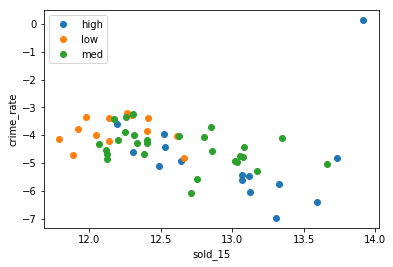

In [10]:
fig, ax = plt.subplots(1, 1)

def scatter(group):
    plt.plot(np.log(group["sold_15"]), np.log(group["crime_rate"]), "o",label=group.name)
    
alldata.groupby("idpopu").apply(scatter)
ax.set(xlabel = "sold_15", ylabel = "crime_rate")
ax.legend(loc = 0)

plt.show()

In [11]:
# draw a dynamic plot of the plot above
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file(username='63xinxin', api_key='mDtzarbNAj4XSeno8Bu2')
import numpy as np

In [27]:
# plot of price vs crime_rate. 
# the reason I got a scatter plot with lines is because I misspelled markers as makers
trace0 = go.Scatter(  #low
    x = np.log(alldata["sold_15"].ix[lowpopu[0]]),
    y = np.log(alldata["crime_rate"].ix[lowpopu[0]]),
    name = "Low",
    mode = "markers",
    text = alldata.loc[alldata["idpopu"]=="low"]["RegionName"],
    marker = dict(
        sizemode='diameter',
        sizeref=0.3,
        size = np.log(alldata.loc[alldata["idpopu"]=="low"]["Population_x"]),
        
    )
)

trace1 = go.Scatter(  #med
    x = np.log(alldata.loc[alldata["idpopu"]=="med"]["sold_15"]),
    y = np.log(alldata.loc[alldata["idpopu"]=="med"]["crime_rate"]),
    name = "Med",
    mode = "markers",
    text = alldata.loc[alldata["idpopu"]=="med"]["RegionName"],
    marker = dict(
        sizemode='diameter',
        sizeref=0.3,
        size = np.log(alldata.loc[alldata["idpopu"]=="med"]["Population_x"]),
        #color = 'green',
        
    )
)

trace2 = go.Scatter(  #high
    x = np.log(alldata["sold_15"].ix[highpopu[0]]),
    y = np.log(alldata["crime_rate"].ix[highpopu[0]]),
    name = "High",
    mode = "markers",
    text = alldata.loc[alldata["idpopu"]=="high"]["RegionName"],
    marker = dict(
        sizemode='diameter',
        sizeref=0.3,
        size = np.log(alldata.loc[alldata["idpopu"]=="high"]["Population_x"]),
        
    )
)



data = [trace0, trace1, trace2]

layout = dict(title = 'Housing Price vs Criminal Rate in 2015',
              yaxis = dict(zeroline = False, title="Log of Criminal Rate"),
              xaxis = dict(zeroline = False, title="Log of Price"),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)',
                
             )


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Housing-Price-vs-Criminal-Rate-in-2015')


<p> From this plot we can find out that there is negative relationship between housing price and criminal rate. The larger the price, the smaller the criminal rate. Even though there is overlap between counties of high population and counties of low population, regions with small population tends to have higher criminal rate. This is a very interesting result. Because, most of the time we will think that if there are more people, there tends to be have larger criminal rate. Also, counties with larger population tend to have higher housing price which is reasonable. </p>

In [ ]:
# plots of relationship between housing price and criminal rate from 2005-2015. The size of the points are the size of population

In [14]:
# total population from 2000-2015
popu_t = pd.read_csv("../Data/CA_population.csv")
popu_t = popu_t.iloc[5:]

In [15]:
all_crime = pd.read_csv("../Data/crime05-15.csv")
# get the summation of column
# transfer to array
all_crime = all_crime.as_matrix()
# transpose
all_crime = np.mean(all_crime[:,2:],axis=0)

In [16]:
# There is no population data in 2011 and 2012. So delete the corresponding crimecases
# is there a easier way to select some values in array?????????????
popu_t["CrimeCases"] = all_crime[np.array([0,1,2,3,4,5,6,9,10])]

In [136]:
# add housing price
#import re
sold_y = pd.read_csv("../Data/CA_sold_t.csv")
#popu_t["sold_15"] = []

In [138]:
import re
sold_y["Year"] = [re.search("([0-9]{4}).*",year).group(1) for year in sold_y["date"]]
group_year = sold_y.groupby("Year").mean().reset_index()  # after grouping by dataframe, use reset_index to let year to be one of the variable instead of group index.
group_year.index = group_year["Year"]
group_year = group_year.iloc[:,1:]
price = pd.DataFrame()
price["Price"] = group_year.mean(axis=1)
price["Year"] = group_year.mean(axis=1).index

In [140]:
# change object into numeric format
price["Year"] = price["Year"].apply(pd.to_numeric)

In [149]:
grouped = pd.merge(popu_t,price,on="Year",how="inner")
grouped["CriminalRate"] = grouped.CrimeCases/grouped.Population
grouped = grouped.iloc[:,1:]
grouped["CriminalRate"] = grouped["CriminalRate"].apply(pd.to_numeric)

In [166]:
grouped["Price"]/100000

0    3.890681
1    4.149781
2    4.063002
3    3.564155
4    2.963238
5    2.737566
6    2.995373
7    3.283453
8    3.495982
Name: Price, dtype: float64

In [173]:
data = [go.Scatter(x = grouped["Year"], 
                   y = np.log(grouped["CriminalRate"]), 
                  mode = "markers+lines",
                  marker = dict(
                    sizemode='diameter',
                    sizeref=0.09,
                    size = grouped["Price"]/100000),
                  text = grouped["Price"]/100000)]
layout = dict(title = 'Criminal Rate from 2005 to 2015',
              yaxis = dict(zeroline = False, title="Log of Criminal Rate"),
              xaxis = dict(zeroline = False, title="Year"),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)',
                
             )
fig = go.Figure(data=data,layout = layout)
py.iplot(fig)

In [118]:
#import cufflinks as cf
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
#grouped.iplot(kind='scatter', xTitle='Year',yTitle='Criminal Rate', title='Time-Series 2005-2015 Criminal Rate for County',filename='index-as-date')

In [80]:
#def year_scatter(county):
#    crimerate = go.Scatter(
#    x = grouped.Year,
#    y = grouped[county],
#    name = county,
#    mode = "lines")
#    return crimerate

In [81]:
#data = [year_scatter(county) for county in grouped.keys()[5:63]]

In [82]:
#layout = go.Layout(
#    title='Criminal Rate from 2005 to 2015 in Califorina',
#    xaxis=dict(
#        title='Year',
#        zeroline = False
#    ),
#    yaxis=dict(
#        title='Criminal Rate',
#        zeroline = False
#    ),
#)

#fig = go.Figure(data=data, layout=layout)
#py.iplot(fig)